# Pandas

<a href="https://colab.research.google.com/github/milocortes/diplomado_ciencia_datos_mide/blob/edicion-2023/notebooks/pandas_mide_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
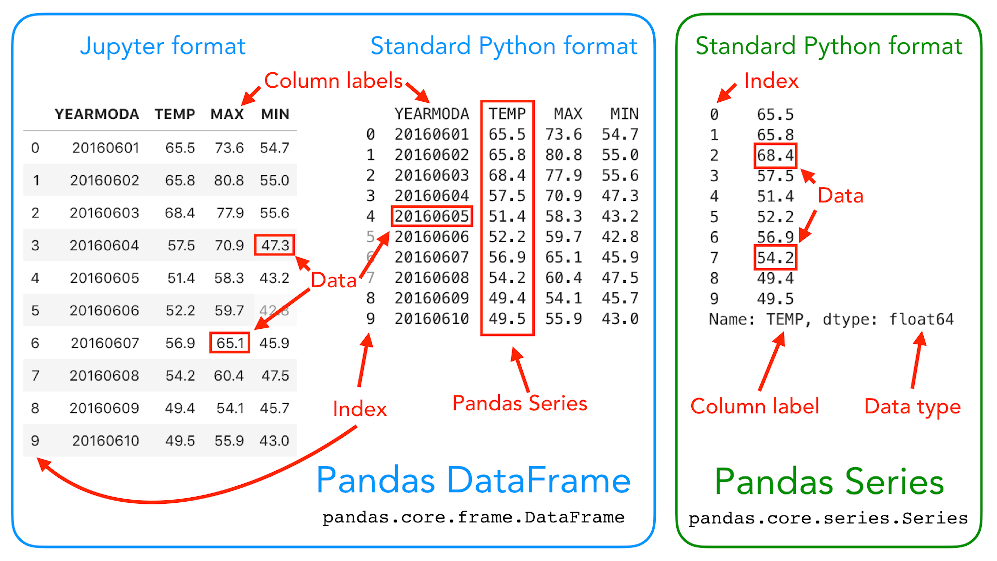


# Pandas 

Pandas es una biblioteca para manipular datos estructurados.

## Importación de datos


Nuestros datos se almacenan en un archivo <code>movies.csv</code>. 

Un archivo CSV (valores separados por comas) es un archivo de texto sin formato que separa cada fila de datos con un salto de línea y cada valor de fila con una coma. La primera fila del archivo contiene los encabezados de columna de los datos. 




Usaremos la función <code>read_csv</code> para importar el archivo <code>movies.csv</code>:

In [1]:
import pandas as pd

movies = pd.read_csv("../datos/movies.csv")
movies

Rank                         Title           Studio       Gross  Year
0       1             Avengers: Endgame      Buena Vista  $2,796.30   2019
1       2                        Avatar              Fox  $2,789.70   2009
2       3                       Titanic        Paramount  $2,187.50   1997
3       4  Star Wars: The Force Awakens      Buena Vista  $2,068.20   2015
4       5        Avengers: Infinity War      Buena Vista  $2,048.40   2018
..    ...                           ...              ...         ...   ...
777   778                     Yogi Bear  Warner Brothers    $201.60   2010
778   779           Garfield: The Movie              Fox    $200.80   2004
779   780                   Cats & Dogs  Warner Brothers    $200.70   2001
780   781      The Hunt for Red October        Paramount    $200.50   1990
781   782                      Valkyrie              MGM    $200.30   2008

[782 rows x 5 columns]

Pandas importa el contenido del archivo CSV en un objeto llamado <code>DataFrame</code>. Piense en un objeto como un contenedor para almacenar datos.


Pandas utiliza un tipo de objeto (el <code>DataFrame</code>) para almacenar conjuntos de datos de varias columnas y otro tipo de objeto (la <code>Series</code>) para almacenar conjuntos de datos de una sola columna.

Este <code>DataFrame</code> consta de cinco columnas (Rank, Title, Studio, Gross, Year) y un índice.

El índice es el rango de números ascendentes en el extremo izquierdo del <code>DataFrame</code>.

Las etiquetas de índice (index labels) sirven como identificadores para las filas de datos. Podemos establecer cualquier columna como el índice de <code>DataFrame<code>. 

Intercambiemos el índice numérico generado automáticamente con los valores de la columna Títle. Podemos hacerlo directamente durante la importación de CSV:

In [2]:
movies = pd.read_csv("../datos/movies.csv", index_col = "Title")
movies

Rank           Studio       Gross  Year
Title                                                                
Avengers: Endgame                1      Buena Vista  $2,796.30   2019
Avatar                           2              Fox  $2,789.70   2009
Titanic                          3        Paramount  $2,187.50   1997
Star Wars: The Force Awakens     4      Buena Vista  $2,068.20   2015
Avengers: Infinity War           5      Buena Vista  $2,048.40   2018
...                            ...              ...         ...   ...
Yogi Bear                      778  Warner Brothers    $201.60   2010
Garfield: The Movie            779              Fox    $200.80   2004
Cats & Dogs                    780  Warner Brothers    $200.70   2001
The Hunt for Red October       781        Paramount    $200.50   1990
Valkyrie                       782              MGM    $200.30   2008

[782 rows x 4 columns]

## Manipulación de <code>DataFrame</code>

Podemos extraer algunas filas desde el principio del <code>DataFrame</code>:

In [3]:
movies.head(4)

Rank       Studio       Gross  Year
Title                                                            
Avengers: Endgame                1  Buena Vista  $2,796.30   2019
Avatar                           2          Fox  $2,789.70   2009
Titanic                          3    Paramount  $2,187.50   1997
Star Wars: The Force Awakens     4  Buena Vista  $2,068.20   2015

O podemos ver final del conjunto de datos en su lugar:

In [4]:
movies.tail(4)

Rank           Studio     Gross  Year
Title                                                          
Garfield: The Movie        779              Fox  $200.80   2004
Cats & Dogs                780  Warner Brothers  $200.70   2001
The Hunt for Red October   781        Paramount  $200.50   1990
Valkyrie                   782              MGM  $200.30   2008

Podemos consultar cuántas filas tiene el <code>DataFrame</code>:

In [5]:
len(movies)

782

Podemos consultar el número de filas y columnas en el <code>DataFrame</code>.

In [6]:
movies.shape

(782, 4)

Podemos pedir los tipos de datos de las cuatro columnas. En el siguiente resultado, <code>int64</code> denota una columna de enteros y <code>object</code> denota una columna de texto:

In [7]:
movies.dtypes

Rank       int64
Studio    object
Gross     object
Year       int64
dtype: object

Podemos extraer una fila del conjunto de datos por su orden numérico, también llamado su posición de índice (index position).

In [8]:
movies.iloc[499]

Rank           500
Studio         Fox
Gross     $288.30 
Year          2018
Name: Maze Runner: The Death Cure, dtype: object

Pandas devuelve un nuevo objeto llamado <code>Series</code> , un arreglo unidimensional de valores etiquetados.

Piénsese una <code>Series</code> como una sola columna de datos con un identificador para cada fila.

Las etiquetas de índice de <code>Series</code> (Rank, Studio, Gross y Year) son las cuatro columnas del <code>DataFrame</code> <code>movies</code>.

También podemos usar una etiqueta de índice para acceder a una fila de DataFrame. Como recordatorio, el índice del  DataFrame contiene los títulos de las películas.


Podemos extraer los valores de fila para *Forrest Gump*. El siguiente ejemplo extrae una fila por su etiqueta de índice en lugar de su posición numérica:


In [9]:
movies.loc["Forrest Gump"]

Rank            119
Studio    Paramount
Gross      $677.90 
Year           1994
Name: Forrest Gump, dtype: object

Las etiquetas de índice pueden contener duplicados. Dos películas en el <code>DataFrame</code> tienen el título "<code>101 Dalmatians</code>", por ejemplo (la original de 1961 y la nueva versión de 1996):

In [10]:
movies.loc["101 Dalmatians"]

Rank       Studio     Gross  Year
Title                                            
101 Dalmatians   425  Buena Vista  $320.70   1996
101 Dalmatians   708  Buena Vista  $215.90   1961


Aunque pandas permite duplicados, se recomienda mantener las etiquetas de índice únicas si es posible.


Las películas en el CSV están ordenadas por valores en la columna Rank. Podemos ordenar el <code>DataFrame</code> por los valores en otra columna, como Year:

In [11]:
movies.sort_values(by = "Year", ascending = False).head()

Rank                  Studio  \
Title                                                                      
Avengers: Endgame                              1             Buena Vista   
John Wick: Chapter 3 - Parabellum            458               Lionsgate   
The Wandering Earth                          114  China Film Corporation   
Toy Story 4                                  198             Buena Vista   
How to Train Your Dragon: The Hidden World   199               Universal   

                                                 Gross  Year  
Title                                                         
Avengers: Endgame                           $2,796.30   2019  
John Wick: Chapter 3 - Parabellum             $304.70   2019  
The Wandering Earth                           $699.80   2019  
Toy Story 4                                   $519.80   2019  
How to Train Your Dragon: The Hidden World    $519.80   2019

También podemos ordenar <code>DataFrames</code> por valores en varias columnas. Ordenemos las películas primero por los valores de la columna Studio y luego por los valores de la columna Year. Ahora podemos ver las películas ordenadas alfabéticamente tanto por estudio como por fecha de estreno:


In [12]:
movies.sort_values(by = ["Studio", "Year"]).head()

Rank       Studio     Gross  Year
Title                                                     
The Blair Witch Project   588      Artisan  $248.60   1999
101 Dalmatians            708  Buena Vista  $215.90   1961
The Jungle Book           755  Buena Vista  $205.80   1967
Who Framed Roger Rabbit   410  Buena Vista  $329.80   1988
Dead Poets Society        636  Buena Vista  $235.90   1989


También podemos ordenar el índice, lo cual es útil si queremos ver las películas en orden alfabético:

In [13]:
movies.sort_index().head()

Rank           Studio     Gross  Year
Title                                                  
10,000 B.C.        536  Warner Brothers  $269.80   2008
101 Dalmatians     708      Buena Vista  $215.90   1961
101 Dalmatians     425      Buena Vista  $320.70   1996
2 Fast 2 Furious   632        Universal  $236.40   2003
2012                93             Sony  $769.70   2009

## Contando valores en una Serie

¿Qué pasaría si quisiéramos averiguar qué estudio de cine tuvo la mayor cantidad de películas con mayor recaudación? Para resolver este problema, necesitaremos contar la cantidad de veces que aparece cada estudio en la columna Studio.

Podemos extraer una sola columna de datos de un <code>DataFrame</code> como una <code>Series</code>. Pandas conserva el índice del <code>DataFrame</code>, los títulos de las películas, en la Serie:

In [14]:
movies["Studio"]

Title
Avengers: Endgame                   Buena Vista
Avatar                                      Fox
Titanic                               Paramount
Star Wars: The Force Awakens        Buena Vista
Avengers: Infinity War              Buena Vista
                                     ...       
Yogi Bear                       Warner Brothers
Garfield: The Movie                         Fox
Cats & Dogs                     Warner Brothers
The Hunt for Red October              Paramount
Valkyrie                                    MGM
Name: Studio, Length: 782, dtype: object

Ahora que hemos aislado la columna Studio, podemos contar el número de ocurrencias de cada valor único. Limitamos los resultados a los 10 mejores estudios:

In [15]:
movies["Studio"].value_counts().head(10)

Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Paramount           76
Dreamworks          27
Lionsgate           21
New Line            16
MGM                 11
Name: Studio, dtype: int64

## Filtrar una columna por uno o más criterios

A menudo se presenta la tarea de extraer un subconjunto de filas en función de uno o más criterios.


¿Y si quisiéramos encontrar solo las películas estrenadas por Universal Studios? Podemos realizar esta tarea con una línea de código en pandas:

In [16]:
movies[movies["Studio"] == "Universal"]

Rank     Studio       Gross  Year
Title                                                            
Jurassic World                     6  Universal  $1,671.70   2015
Furious 7                          8  Universal  $1,516.00   2015
Jurassic World: Fallen Kingdom    13  Universal  $1,309.50   2018
The Fate of the Furious           17  Universal  $1,236.00   2017
Minions                           19  Universal  $1,159.40   2015
...                              ...        ...         ...   ...
The Break-Up                     763  Universal    $205.00   2006
Everest                          766  Universal    $203.40   2015
Patch Adams                      772  Universal    $202.30   1998
Kindergarten Cop                 775  Universal    $202.00   1990
Straight Outta Compton           776  Universal    $201.60   2015

[109 rows x 4 columns]

o de manera equivalente podemos usar el método <code>query</code>

In [17]:
movies.query("Studio=='Universal'")

Rank     Studio       Gross  Year
Title                                                            
Jurassic World                     6  Universal  $1,671.70   2015
Furious 7                          8  Universal  $1,516.00   2015
Jurassic World: Fallen Kingdom    13  Universal  $1,309.50   2018
The Fate of the Furious           17  Universal  $1,236.00   2017
Minions                           19  Universal  $1,159.40   2015
...                              ...        ...         ...   ...
The Break-Up                     763  Universal    $205.00   2006
Everest                          766  Universal    $203.40   2015
Patch Adams                      772  Universal    $202.30   1998
Kindergarten Cop                 775  Universal    $202.00   1990
Straight Outta Compton           776  Universal    $201.60   2015

[109 rows x 4 columns]

También podemos filtrar filas de <code>DataFrame</code> por múltiples criterios. El siguiente ejemplo filtra todas las películas estrenadas por Universal Studios *y* estrenadas en 2015:

In [18]:
movies[(movies["Studio"] == "Universal") & (movies["Year"] == 2015)]

Rank     Studio       Gross  Year
Title                                                    
Jurassic World             6  Universal  $1,671.70   2015
Furious 7                  8  Universal  $1,516.00   2015
Minions                   19  Universal  $1,159.40   2015
Fifty Shades of Grey     165  Universal    $571.00   2015
Pitch Perfect 2          504  Universal    $287.50   2015
Ted 2                    702  Universal    $216.70   2015
Everest                  766  Universal    $203.40   2015
Straight Outta Compton   776  Universal    $201.60   2015

o de manera equivalente con <code>query</code>

In [19]:
movies.query("Studio=='Universal' and Year==2015")

Rank     Studio       Gross  Year
Title                                                    
Jurassic World             6  Universal  $1,671.70   2015
Furious 7                  8  Universal  $1,516.00   2015
Minions                   19  Universal  $1,159.40   2015
Fifty Shades of Grey     165  Universal    $571.00   2015
Pitch Perfect 2          504  Universal    $287.50   2015
Ted 2                    702  Universal    $216.70   2015
Everest                  766  Universal    $203.40   2015
Straight Outta Compton   776  Universal    $201.60   2015

El ejemplo anterior incluye filas que cumplen ambas condiciones. 

También podemos filtrar por películas que se ajusten a cualquiera de las dos condiciones: estrenadas por Universal *o* estrenadas en 2015.

In [20]:
movies[(movies["Studio"] == "Universal") | (movies["Year"] == 2015)]

Rank       Studio       Gross  Year
Title                                                              
Star Wars: The Force Awakens       4  Buena Vista  $2,068.20   2015
Jurassic World                     6    Universal  $1,671.70   2015
Furious 7                          8    Universal  $1,516.00   2015
Avengers: Age of Ultron            9  Buena Vista  $1,405.40   2015
Jurassic World: Fallen Kingdom    13    Universal  $1,309.50   2018
...                              ...          ...         ...   ...
The Break-Up                     763    Universal    $205.00   2006
Everest                          766    Universal    $203.40   2015
Patch Adams                      772    Universal    $202.30   1998
Kindergarten Cop                 775    Universal    $202.00   1990
Straight Outta Compton           776    Universal    $201.60   2015

[140 rows x 4 columns]

o de manera equivalente con <code>query</code>

In [21]:
movies.query("Studio=='Universal' or Year==2015")

Rank       Studio       Gross  Year
Title                                                              
Star Wars: The Force Awakens       4  Buena Vista  $2,068.20   2015
Jurassic World                     6    Universal  $1,671.70   2015
Furious 7                          8    Universal  $1,516.00   2015
Avengers: Age of Ultron            9  Buena Vista  $1,405.40   2015
Jurassic World: Fallen Kingdom    13    Universal  $1,309.50   2018
...                              ...          ...         ...   ...
The Break-Up                     763    Universal    $205.00   2006
Everest                          766    Universal    $203.40   2015
Patch Adams                      772    Universal    $202.30   1998
Kindergarten Cop                 775    Universal    $202.00   1990
Straight Outta Compton           776    Universal    $201.60   2015

[140 rows x 4 columns]


Pandas proporciona formas adicionales de filtrar un <code>DataFrame</code>. Por ejemplo, podemos filtrar los valores de una columna que se sean menores o mayores que un valor específico. 

Aquí, apuntamos a las películas estrenadas antes de 1975:

In [22]:
movies[movies["Year"] < 1975]

Rank           Studio     Gross  Year
Title                                                    
The Exorcist         252  Warner Brothers  $441.30   1973
Gone with the Wind   288              MGM  $402.40   1939
Bambi                540              RKO  $267.40   1942
The Godfather        604        Paramount  $245.10   1972
101 Dalmatians       708      Buena Vista  $215.90   1961
The Jungle Book      755      Buena Vista  $205.80   1967

o de manera equivalente con <code>query</code>:

In [23]:
movies.query("Year<1975")

Rank           Studio     Gross  Year
Title                                                    
The Exorcist         252  Warner Brothers  $441.30   1973
Gone with the Wind   288              MGM  $402.40   1939
Bambi                540              RKO  $267.40   1942
The Godfather        604        Paramount  $245.10   1972
101 Dalmatians       708      Buena Vista  $215.90   1961
The Jungle Book      755      Buena Vista  $205.80   1967

También podemos especificar un rango entre el cual deben caer todos los valores.

El siguiente ejemplo extrae películas estrenadas entre 1983 y 1986:

In [24]:
movies[movies["Year"].between(1983, 1986)]

Rank     Studio     Gross  Year
Title                                                                
Return of the Jedi                     222        Fox  $475.10   1983
Back to the Future                     311  Universal  $381.10   1985
Top Gun                                357  Paramount  $356.80   1986
Indiana Jones and the Temple of Doom   403  Paramount  $333.10   1984
Crocodile Dundee                       413  Paramount  $328.20   1986
Beverly Hills Cop                      432  Paramount  $316.40   1984
Rocky IV                               467        MGM  $300.50   1985
Rambo: First Blood Part II             469    TriStar  $300.40   1985
Ghostbusters                           485   Columbia  $295.20   1984
Out of Africa                          662  Universal  $227.50   1985

o de manera equivalente con <code>query</code>:

In [25]:
movies.query("(Year>=1983 and Year<=1986)")

Rank     Studio     Gross  Year
Title                                                                
Return of the Jedi                     222        Fox  $475.10   1983
Back to the Future                     311  Universal  $381.10   1985
Top Gun                                357  Paramount  $356.80   1986
Indiana Jones and the Temple of Doom   403  Paramount  $333.10   1984
Crocodile Dundee                       413  Paramount  $328.20   1986
Beverly Hills Cop                      432  Paramount  $316.40   1984
Rocky IV                               467        MGM  $300.50   1985
Rambo: First Blood Part II             469    TriStar  $300.40   1985
Ghostbusters                           485   Columbia  $295.20   1984
Out of Africa                          662  Universal  $227.50   1985

También podemos usar el índice del <code>DataFrame</code> para filtrar filas.

El siguiente ejemplo pone en minúsculas los títulos de las películas en el índice y encuentra todas las películas con la palabra "<code>dark</code>" en su título:

In [26]:
has_dark_in_title = movies.index.str.lower().str.contains("dark")
movies[has_dark_in_title]

Rank           Studio       Gross  Year
Title                                                                  
Transformers: Dark of the Moon    23        Paramount  $1,123.80   2011
The Dark Knight Rises             27  Warner Brothers  $1,084.90   2012
The Dark Knight                   39  Warner Brothers  $1,004.90   2008
Thor: The Dark World             132      Buena Vista    $644.60   2013
Star Trek Into Darkness          232        Paramount    $467.40   2013
Fifty Shades Darker              309        Universal    $381.50   2017
Dark Shadows                     600  Warner Brothers    $245.50   2012
Dark Phoenix                     603              Fox    $245.10   2019

¿Qué pasa si queremos filtrar por las películas que pertenecen a Warner Brothers, Dreamworks y Fox? Podríamos proporcionar tres Series booleanas separadas dentro de los corchetes y agregar el | símbolo para declarar los criterios OR

In [27]:
movies[(movies["Studio"] == "Warner Brothers") | (movies["Studio"] == "Dreamworks")| (movies["Studio"] == "Fox") ]

Rank           Studio  \
Title                                                                
Avatar                                          2              Fox   
Harry Potter and the Deathly Hallows Part 2    11  Warner Brothers   
Aquaman                                        21  Warner Brothers   
The Dark Knight Rises                          27  Warner Brothers   
Star Wars: Episode I - The Phantom Menace      35              Fox   
...                                           ...              ...   
Me Before You                                 747  Warner Brothers   
JFK                                           758  Warner Brothers   
Yogi Bear                                     778  Warner Brothers   
Garfield: The Movie                           779              Fox   
Cats & Dogs                                   780  Warner Brothers   

                                                  Gross  Year  
Title                                                          
Avatar                                       $2,789.70   2009  
Harry Potter and the Deathly Hallows Part 2  $1,341.70   2011  
Aquaman                                      $1,148.00   2018  
The Dark Knight Rises                        $1,084.90   2012  
Star Wars: Episode I - The Phantom Menace    $1,027.00   1999  
...                                                 ...   ...  
Me Before You                                  $208.30   2016  
JFK                                            $205.40   1991  
Yogi Bear                                      $201.60   2010  
Garfield: The Movie                            $200.80   2004  
Cats & Dogs                                    $200.70   2001  

[276 rows x 4 columns]

In [28]:
movies.query("Studio == 'Warner Brothers' or Studio=='Dreamworks' or Studio =='Fox'")

Rank           Studio  \
Title                                                                
Avatar                                          2              Fox   
Harry Potter and the Deathly Hallows Part 2    11  Warner Brothers   
Aquaman                                        21  Warner Brothers   
The Dark Knight Rises                          27  Warner Brothers   
Star Wars: Episode I - The Phantom Menace      35              Fox   
...                                           ...              ...   
Me Before You                                 747  Warner Brothers   
JFK                                           758  Warner Brothers   
Yogi Bear                                     778  Warner Brothers   
Garfield: The Movie                           779              Fox   
Cats & Dogs                                   780  Warner Brothers   

                                                  Gross  Year  
Title                                                          
Avatar                                       $2,789.70   2009  
Harry Potter and the Deathly Hallows Part 2  $1,341.70   2011  
Aquaman                                      $1,148.00   2018  
The Dark Knight Rises                        $1,084.90   2012  
Star Wars: Episode I - The Phantom Menace    $1,027.00   1999  
...                                                 ...   ...  
Me Before You                                  $208.30   2016  
JFK                                            $205.40   1991  
Yogi Bear                                      $201.60   2010  
Garfield: The Movie                            $200.80   2004  
Cats & Dogs                                    $200.70   2001  

[276 rows x 4 columns]

Aunque estas soluciones funcionan, no son escalables.

Una mejor solución es el método <code>isin</code>, que acepta un objeto iterable (lista, tupla, Series, etc.) y devuelve un booleano <code>Series</code> . <code>True</code> indica que pandas encontró el valor de la fila entre los valores iterables, y <code>False</code> indica que no lo encontró.


In [29]:
movies[movies["Studio"].isin(['Warner Brothers', 'Dreamworks', 'Fox'])]

Rank           Studio  \
Title                                                                
Avatar                                          2              Fox   
Harry Potter and the Deathly Hallows Part 2    11  Warner Brothers   
Aquaman                                        21  Warner Brothers   
The Dark Knight Rises                          27  Warner Brothers   
Star Wars: Episode I - The Phantom Menace      35              Fox   
...                                           ...              ...   
Me Before You                                 747  Warner Brothers   
JFK                                           758  Warner Brothers   
Yogi Bear                                     778  Warner Brothers   
Garfield: The Movie                           779              Fox   
Cats & Dogs                                   780  Warner Brothers   

                                                  Gross  Year  
Title                                                          
Avatar                                       $2,789.70   2009  
Harry Potter and the Deathly Hallows Part 2  $1,341.70   2011  
Aquaman                                      $1,148.00   2018  
The Dark Knight Rises                        $1,084.90   2012  
Star Wars: Episode I - The Phantom Menace    $1,027.00   1999  
...                                                 ...   ...  
Me Before You                                  $208.30   2016  
JFK                                            $205.40   1991  
Yogi Bear                                      $201.60   2010  
Garfield: The Movie                            $200.80   2004  
Cats & Dogs                                    $200.70   2001  

[276 rows x 4 columns]

##  Agrupación de datos

Podríamos tener curiosidad sobre qué estudio tuvo los ingresos brutos totales más altos en todas las películas. Agreguemos por estudio los valores en la columna Gross. Nuestro primer dilema es que los valores de la columna Gross se almacenan como texto en lugar de como números.

Pandas importó los valores de la columna como texto para conservar los signos de dólar y las comas en el CSV original. Podemos convertir los valores de la columna a números decimales, pero solo si eliminamos ambos caracteres.


Podemos resolver este problema con funciones <code>lambda</code> y el método <code>apply</code> de la clase <code>Series</code> .


In [30]:
movies["Gross"].apply(lambda x: float(x.replace("$","").replace(",","")))

Title
Avengers: Endgame               2796.3
Avatar                          2789.7
Titanic                         2187.5
Star Wars: The Force Awakens    2068.2
Avengers: Infinity War          2048.4
                                 ...  
Yogi Bear                        201.6
Garfield: The Movie              200.8
Cats & Dogs                      200.7
The Hunt for Red October         200.5
Valkyrie                         200.3
Name: Gross, Length: 782, dtype: float64


Sobrescribimos la columna Gross en <code>movies</code> con una nueva columna de números con punto decimal. Ahora la transformación es permanente.

In [31]:
movies["Gross"] = movies["Gross"].apply(lambda x: float(x.replace("$","").replace(",","")))



El siguiente ejemplo calcula los ingresos brutos promedio de las películas:

In [32]:
movies["Gross"].mean()

439.0308184143226


Aún no resolvemos nuestro problema original: calcular los ingresos brutos por estudio de cine. Primero, necesitaremos identificar los estudios y clasificar las películas (o filas) que pertenecen a cada uno.

Este proceso se llama **agrupamiento**.

En el siguiente ejemplo, agrupamos las filas de <code>DataFrame</code> según los valores de la columna Studio:

In [33]:
studios = movies.groupby("Studio")
studios["Gross"].count().head()

Studio
Artisan                     1
Buena Vista               125
CL                          1
China Film Corporation      1
Columbia                    5
Name: Gross, dtype: int64

Los resultados anteriores están ordenados alfabéticamente por nombre de estudio. En su lugar, podemos ordenar el objeto <code>Series</code> por número de películas, de mayor a menor:

In [34]:
studios["Gross"].count().sort_values(ascending = False).head()

Studio
Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Name: Gross, dtype: int64

Queremos identificar los estudios con los ingresos brutos más altos, de manera que tenemos que ordenar los valores de la <code>Serie</code> en orden descendente. Aquí están los cinco estudios con los mayores ingresos brutos:

In [35]:
studios["Gross"].sum().sort_values(ascending = False).head()

Studio
Buena Vista        73585.0
Warner Brothers    58643.8
Fox                50420.8
Universal          44302.3
Sony               32822.5
Name: Gross, dtype: float64

In [36]:
movies.groupby("Studio")\
                        .agg({"Studio" : "count", "Gross" : "sum"})\
                        .rename(columns = {"Studio" : "Studio_conteo" , "Gross" : "Gross_suma"})\
                        .reset_index()

Studio  Studio_conteo  Gross_suma
0                  Artisan              1       248.6
1              Buena Vista            125     73585.0
2                       CL              1       228.1
3   China Film Corporation              1       699.8
4                 Columbia              5      1276.6
5                Dimension              2       488.7
6               Dreamworks             27     12260.4
7                       FR              1       385.3
8                      FUN              1       358.0
9                    Focus              1       205.8
10                     Fox            117     50420.8
11                GrtIndia              1       254.2
12                      HC              1       870.3
13                     IFC              1       368.7
14                   Lions              1       222.4
15               Lionsgate             21     10033.2
16                     MGM             11      3513.1
17                   Magn.              1       205.6
18                 Miramax             10      2480.6
19                New Line             16      6584.8
20               Newmarket              1       611.9
21                   Orion              2       696.9
22               Paramount             76     32486.0
23                   Pathe              1       245.1
24                Polygram              2       496.9
25                     RKO              1       267.4
26                   Rela.              1       226.9
27                    SonR              2       515.1
28                    Sony             86     32822.5
29                 TriStar             11      3185.5
30                     USA              1       207.5
31                     UTV              1       302.9
32               Universal            109     44302.3
33                 Vestron              1       214.6
34                   WGUSA              4      1349.1
35         Warner Brothers            132     58643.8
36               Weinstein              6      2057.7

# Concatenación, merge y  join

## Concatenación

La forma más sencilla de combinar dos data sets es mediante concatenación -al agregar un DataFrame al final de otro DataFrame. 

Pandas tiene la función <code>concat</code> para concatenar DataFrames.

Por defecto, pandas concatena filas en el eje horizontal


In [37]:
sports_champions_A = pd.DataFrame(
                                data = [
                                        [2017,"New England Patriots", "Houston Astros"],
                                        [2018,"Philadelphia Eagles", "Boston Red Sox"]
                                        ],
                                columns = ["Year", "Football", "Baseball"])
sports_champions_A

Year              Football        Baseball
0  2017  New England Patriots  Houston Astros
1  2018   Philadelphia Eagles  Boston Red Sox

In [38]:
sports_champions_B = pd.DataFrame(
                                data = [
                                        [2019, "New England Patriots", "Washington Nationals"],
                                        [2020, "Kansas City Chiefs", "Los Angeles Dodgers"]
                                        ],
                                columns = ["Year", "Football", "Baseball"]
                                )
sports_champions_B

Year              Football              Baseball
0  2019  New England Patriots  Washington Nationals
1  2020    Kansas City Chiefs   Los Angeles Dodgers

In [39]:
sports_champions_C = pd.concat([sports_champions_A, sports_champions_B]).reset_index(drop = True)
sports_champions_C

Year              Football              Baseball
0  2017  New England Patriots        Houston Astros
1  2018   Philadelphia Eagles        Boston Red Sox
2  2019  New England Patriots  Washington Nationals
3  2020    Kansas City Chiefs   Los Angeles Dodgers

In [40]:
sports_champions_D = pd.DataFrame(
                                data = [
                                        [2017, "Golden State Warriors"],
                                        [2018, "Golden State Warriors"],
                                        [2019,"Golden State Warriors"],
                                        [2020, "Los Angeles Lakers "]
                                        ],
                                columns = ["Year","Basketball"]
)
sports_champions_D

Year             Basketball
0  2017  Golden State Warriors
1  2018  Golden State Warriors
2  2019  Golden State Warriors
3  2020    Los Angeles Lakers

Podemos concatenar DataFrames de acuerdo al eje de las columnas, agregando el argumento <code>axis = 1</code> a la función <code>concat</code>

In [41]:
sports_champions_E = pd.concat([sports_champions_C.set_index("Year"),
           sports_champions_D.set_index("Year")], axis = 1)
sports_champions_E

Football              Baseball             Basketball
Year                                                                   
2017  New England Patriots        Houston Astros  Golden State Warriors
2018   Philadelphia Eagles        Boston Red Sox  Golden State Warriors
2019  New England Patriots  Washington Nationals  Golden State Warriors
2020    Kansas City Chiefs   Los Angeles Dodgers    Los Angeles Lakers

In [42]:
sports_champions_F = pd.DataFrame(
                                    {"Hockey" : ["Pittsburgh Penguins", "Washington Capitals"]},
                                index = [2017, 2018]
)
sports_champions_F

Hockey
2017  Pittsburgh Penguins
2018  Washington Capitals

In [43]:
pd.concat([sports_champions_E, sports_champions_F], axis = 1)

Football              Baseball             Basketball  \
2017  New England Patriots        Houston Astros  Golden State Warriors   
2018   Philadelphia Eagles        Boston Red Sox  Golden State Warriors   
2019  New England Patriots  Washington Nationals  Golden State Warriors   
2020    Kansas City Chiefs   Los Angeles Dodgers    Los Angeles Lakers    

                   Hockey  
2017  Pittsburgh Penguins  
2018  Washington Capitals  
2019                  NaN  
2020                  NaN

## Merge y  join

Un join usa un criterio lógico para determinar qué filas o columnas se combinarán entre dos DataFrames

Un join puede corresponder solo a filas con valores compartidos entre ambos conjuntos de datos


Pandas ofrece tres tipos de joins:

* left join
* inner join
* outer join

### Left joins



### Inner joins

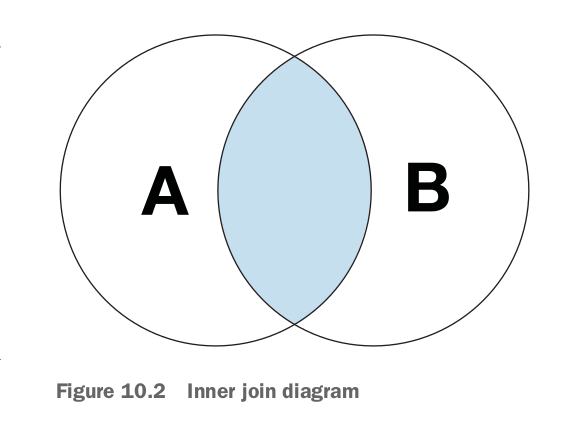

### Outer joins 

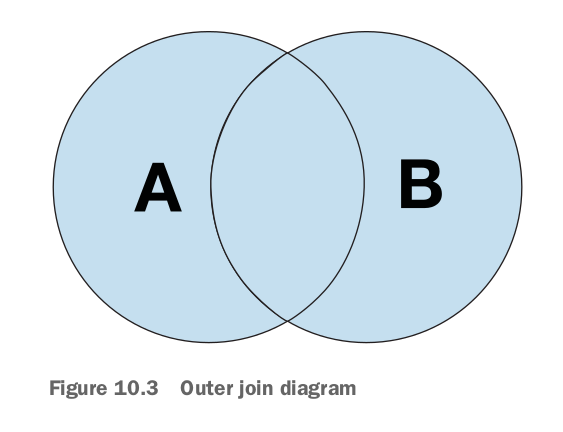



Usaremos dos recursos:
* Microdatos del censo de 2020, INEGI (https://www.inegi.org.mx/programas/ccpv/2020/#datos_abiertos)
* Indicadores de Pobreza Municipal, CONEVAL (https://datos.gob.mx/busca/dataset/indicadores-de-pobreza-municipal-2010--2020)

In [44]:
# Cargamos los datos de censo para la CDMX
url_root = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/iter/ITER_{:02d}_2020_csv.zip".format(9)

cdmx_censo = pd.read_csv(url_root)


In [45]:
# Filtramos por el total municipal
cdmx_muni_censo = cdmx_censo.query("NOM_LOC == 'Total del Municipio'")
cdmx_muni_censo

ENTIDAD           NOM_ENT  MUN                 NOM_MUN  LOC  \
3          9  Ciudad de México    2            Azcapotzalco    0   
5          9  Ciudad de México    3                Coyoacán    0   
7          9  Ciudad de México    4   Cuajimalpa de Morelos    0   
34         9  Ciudad de México    5       Gustavo A. Madero    0   
36         9  Ciudad de México    6               Iztacalco    0   
38         9  Ciudad de México    7              Iztapalapa    0   
40         9  Ciudad de México    8  La Magdalena Contreras    0   
66         9  Ciudad de México    9              Milpa Alta    0   
313        9  Ciudad de México   10          Álvaro Obregón    0   
322        9  Ciudad de México   11                 Tláhuac    0   
377        9  Ciudad de México   12                 Tlalpan    0   
544        9  Ciudad de México   13              Xochimilco    0   
658        9  Ciudad de México   14           Benito Juárez    0   
660        9  Ciudad de México   15              Cuauhtémoc    0   
662        9  Ciudad de México   16          Miguel Hidalgo    0   
664        9  Ciudad de México   17     Venustiano Carranza    0   

                 NOM_LOC LONGITUD LATITUD  ALTITUD   POBTOT  ... VPH_CEL  \
3    Total del Municipio      NaN     NaN      NaN   432205  ...  123961   
5    Total del Municipio      NaN     NaN      NaN   614447  ...  179280   
7    Total del Municipio      NaN     NaN      NaN   217686  ...   56543   
34   Total del Municipio      NaN     NaN      NaN  1173351  ...  306796   
36   Total del Municipio      NaN     NaN      NaN   404695  ...  108707   
38   Total del Municipio      NaN     NaN      NaN  1835486  ...  455216   
40   Total del Municipio      NaN     NaN      NaN   247622  ...   62286   
66   Total del Municipio      NaN     NaN      NaN   152685  ...   33845   
313  Total del Municipio      NaN     NaN      NaN   759137  ...  203151   
322  Total del Municipio      NaN     NaN      NaN   392313  ...   96419   
377  Total del Municipio      NaN     NaN      NaN   699928  ...  188352   
544  Total del Municipio      NaN     NaN      NaN   442178  ...  106703   
658  Total del Municipio      NaN     NaN      NaN   434153  ...  170360   
660  Total del Municipio      NaN     NaN      NaN   545884  ...  183557   
662  Total del Municipio      NaN     NaN      NaN   414470  ...  137103   
664  Total del Municipio      NaN     NaN      NaN   443704  ...  124244   

    VPH_INTER VPH_STVP VPH_SPMVPI VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT  \
3      105899    66399      50965   31801       1661       2869       22687   
5      157908   101660      80413   44991       2893       3506       27008   
7       46389    31667      24817   14591        914       1675       11961   
34     246278   143954      95131   60940       5779      11780       79559   
36      91039    53971      40298   25607       1568       2666       21763   
38     349103   183804     116462   82472       9371      18791      132846   
40      50653    34426      21456   13357       1029       2064       14893   
66      19798     8170       4273    3030       1061       2683       17031   
313    169135   120733      83063   49379       3120       5739       41663   
322     71996    42449      22015   15852       2308       4283       29742   
377    151857    94253      69538   41272       3160       5328       42808   
544     77848    37859      26763   17813       2323       4376       33888   
658    161786   122608     112039   54473       2434       1141       10638   
660    157682    98006      87040   45215       4197       4123       31274   
662    124777    88559      77955   39658       2459       2398       15787   
664    102008    62293      44934   28376       1895       3850       27580   

    VPH_SINTIC TAMLOC  
3          322      *  
5          443      *  
7          180      *  
34        1523      *  
36         322      *  
38        2489      *  
40         308      *  
66         395     

In [46]:
# Descargamos los datos de Indicadores de pobreza municipal 2020
url_pobreza = "https://www.coneval.org.mx/Informes/Pobreza/Datos_abiertos/pobreza_municipal_2010-2020/indicadores%20de%20pobreza%20municipal_2020.csv"
pobreza_municipal = pd.read_csv(url_pobreza, encoding='latin-1')
pobreza_municipal

clave_entidad entidad_federativa  clave_municipio  \
0                 1     Aguascalientes             1001   
1                 1     Aguascalientes             1002   
2                 1     Aguascalientes             1003   
3                 1     Aguascalientes             1004   
4                 1     Aguascalientes             1005   
...             ...                ...              ...   
2464             32          Zacatecas            32054   
2465             32          Zacatecas            32055   
2466             32          Zacatecas            32056   
2467             32          Zacatecas            32057   
2468             32          Zacatecas            32058   

                  municipio poblacion pobreza pobreza_pob pobreza_e  \
0            Aguascalientes   922,268    23.7     218,414       2.0   
1                  Asientos    48,635    40.1      19,518       4.1   
2                  Calvillo    52,377    45.8      23,966       4.5   
3                     Cosío    15,942    37.0       5,905       3.4   
4               Jesús María   127,962    26.3      33,708       3.3   
...                     ...       ...     ...         ...       ...   
2464          Villa Hidalgo    20,674    74.9      15,483       9.0   
2465             Villanueva    32,969    50.6      16,673       4.3   
2466              Zacatecas   149,864    23.4      35,054       2.6   
2467               Trancoso    20,270    63.9      12,962       6.4   
2468  Santa María de la Paz     2,792    48.0       1,339       2.4   

     pobreza_e_pob pobreza_m  ... ic_ali ic_ali_pob carencias carencias_pob  \
0           18,206      21.7  ...   15.8    145,444      51.6       475,558   
1            2,015      36.0  ...   28.5     13,870      79.7        38,761   
2            2,356      41.3  ...   20.1     10,552      86.2        45,164   
3              538      33.7  ...   25.0      3,980      69.3        11,043   
4            4,204      23.1  ...   17.9     22,945      59.3        75,894   
...            ...       ...  ...    ...        ...       ...           ...   
2464         1,863      65.9  ...   29.0      5,985      91.6        18,940   
2465         1,415      46.3  ...   16.1      5,321      80.9        26,672   
2466         3,822      20.8  ...   14.1     21,190      50.3        75,367   
2467         1,290      57.6  ...   26.0      5,268      81.2        16,462   
2468            68      45.5  ...   13.6        380      80.9         2,258   

     carencias3 carencias3_pob   plp  plp_pob plp_e plp_e_pob  
0           7.2         66,231  33.7  310,444   9.0    82,866  
1          15.7          7,650  46.8   22,737  15.8     7,683  
2          14.4          7,520  49.5   25,935  16.0     8,380  
3          10.9          1,736  47.0    7,488  16.5     2,634  
4          11.0         14,069  34.0   43,565  10.9    13,912  
...         ...            ...   ...      ...   ...       ...  
2464       19.5          4,039  79.2   16,377  41.5     8,574  
2465       14.4          4,735  58.9   19,407  23.2     7,634  
2466        7.5         11,199  34.6   51,866  11.0    16,491  
2467       14.4          2,910  74.5   15,098  37.9     7,678  
2468        9.0            251  55.4    1,546  19.5       545  

[2469 rows x 37 columns]

In [47]:
pobreza_municipal_cdmx = pobreza_municipal.query("clave_entidad == 9")
pobreza_municipal_cdmx

clave_entidad entidad_federativa  clave_municipio  \
273              9   Ciudad de México             9002   
274              9   Ciudad de México             9003   
275              9   Ciudad de México             9004   
276              9   Ciudad de México             9005   
277              9   Ciudad de México             9006   
278              9   Ciudad de México             9007   
279              9   Ciudad de México             9008   
280              9   Ciudad de México             9009   
281              9   Ciudad de México             9010   
282              9   Ciudad de México             9011   
283              9   Ciudad de México             9012   
284              9   Ciudad de México             9013   
285              9   Ciudad de México             9014   
286              9   Ciudad de México             9015   
287              9   Ciudad de México             9016   
288              9   Ciudad de México             9017   

                  municipio  poblacion pobreza pobreza_pob pobreza_e  \
273            Azcapotzalco    404,958    24.2      97,943       2.5   
274                Coyoacán    568,913    27.1     154,045       2.9   
275   Cuajimalpa de Morelos    199,872    32.5      64,917       4.5   
276       Gustavo A. Madero  1,130,265    33.8     381,752       3.7   
277               Iztacalco    376,976    25.2      95,006       2.6   
278              Iztapalapa  1,760,382    43.9     772,584       6.6   
279  La Magdalena Contreras    241,690    42.5     102,723       6.7   
280              Milpa Alta    161,267    54.7      88,193       9.1   
281          Álvaro Obregón    726,046    37.7     273,656       5.6   
282                 Tláhuac    377,744    42.4     160,199       5.1   
283                 Tlalpan    690,788    39.7     274,221       7.1   
284              Xochimilco    437,383    48.2     210,781       9.3   
285           Benito Juárez    373,752     7.9      29,466       0.3   
286              Cuauhtémoc    491,816    20.9     102,753       2.5   
287          Miguel Hidalgo    364,554    13.5      49,100       0.9   
288     Venustiano Carranza    414,914    30.0     124,431       2.9   

    pobreza_e_pob pobreza_m  ... ic_ali ic_ali_pob carencias carencias_pob  \
273         9,990      21.7  ...   10.9     44,230      46.5       188,193   
274        16,777      24.1  ...   11.9     67,750      50.0       284,726   
275         8,902      28.0  ...   15.1     30,264      59.7       119,367   
276        41,672      30.1  ...   17.6    198,499      55.9       632,099   
277         9,856      22.6  ...   13.2     49,657      50.9       191,887   
278       115,470      37.3  ...   20.3    357,903      66.1     1,163,929   
279        16,224      35.8  ...   15.8     38,307      64.2       155,078   
280        14,755      45.5  ...   23.9     38,507      81.5       131,420   
281        40,958      32.1  ...   16.4    118,999      60.6       439,830   
282        19,315      37.3  ...   18.0     67,895      65.7       248,251   
283        48,938      32.6  ...   19.7    135,851      65.5       452,444   
284        40,693      38.9  ...   19.0     83,026      70.1       306,528   
285         1,167       7.6  ...    5.7     21,219      38.8       145,186   
286        12,053      18.4  ...   12.6     62,083      50.6       249,035   
287         3,406      12.5  ...    8.3     30,395      42.9       156,441   
288        12,066      27.1  ...   10.8     44,753      54.6       226,365   

    carencias3 carencias3_pob   plp  plp_pob plp_e plp_e_pob  
273        5.9         24,084  35.9  145,394  10.3    41,800  
274        6.9         39,376  38.1  216,579  12.5    71,368  
275        9.3         18,609  41.6   83,182  13.5    27,017  
276        8.3         93,634  46.2  522,721  15.2   172,153  
277        7.4         27,897  34.2  128,870  10.3    38,806  
278       13.6        240,027  54.4  956,998  20.6   362,871  
279       13.5         32

In [48]:
# Generamos la columna clave_municipio para poder unir los dos DataFrames
cdmx_muni_censo.loc[:, "clave_municipio"] = cdmx_muni_censo["ENTIDAD"].astype(str) + cdmx_muni_censo["MUN"].apply(lambda x : f"{x:03d}")
cdmx_muni_censo

/home/milo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/milo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


ENTIDAD           NOM_ENT  MUN                 NOM_MUN  LOC  \
3          9  Ciudad de México    2            Azcapotzalco    0   
5          9  Ciudad de México    3                Coyoacán    0   
7          9  Ciudad de México    4   Cuajimalpa de Morelos    0   
34         9  Ciudad de México    5       Gustavo A. Madero    0   
36         9  Ciudad de México    6               Iztacalco    0   
38         9  Ciudad de México    7              Iztapalapa    0   
40         9  Ciudad de México    8  La Magdalena Contreras    0   
66         9  Ciudad de México    9              Milpa Alta    0   
313        9  Ciudad de México   10          Álvaro Obregón    0   
322        9  Ciudad de México   11                 Tláhuac    0   
377        9  Ciudad de México   12                 Tlalpan    0   
544        9  Ciudad de México   13              Xochimilco    0   
658        9  Ciudad de México   14           Benito Juárez    0   
660        9  Ciudad de México   15              Cuauhtémoc    0   
662        9  Ciudad de México   16          Miguel Hidalgo    0   
664        9  Ciudad de México   17     Venustiano Carranza    0   

                 NOM_LOC LONGITUD LATITUD  ALTITUD   POBTOT  ... VPH_INTER  \
3    Total del Municipio      NaN     NaN      NaN   432205  ...    105899   
5    Total del Municipio      NaN     NaN      NaN   614447  ...    157908   
7    Total del Municipio      NaN     NaN      NaN   217686  ...     46389   
34   Total del Municipio      NaN     NaN      NaN  1173351  ...    246278   
36   Total del Municipio      NaN     NaN      NaN   404695  ...     91039   
38   Total del Municipio      NaN     NaN      NaN  1835486  ...    349103   
40   Total del Municipio      NaN     NaN      NaN   247622  ...     50653   
66   Total del Municipio      NaN     NaN      NaN   152685  ...     19798   
313  Total del Municipio      NaN     NaN      NaN   759137  ...    169135   
322  Total del Municipio      NaN     NaN      NaN   392313  ...     71996   
377  Total del Municipio      NaN     NaN      NaN   699928  ...    151857   
544  Total del Municipio      NaN     NaN      NaN   442178  ...     77848   
658  Total del Municipio      NaN     NaN      NaN   434153  ...    161786   
660  Total del Municipio      NaN     NaN      NaN   545884  ...    157682   
662  Total del Municipio      NaN     NaN      NaN   414470  ...    124777   
664  Total del Municipio      NaN     NaN      NaN   443704  ...    102008   

    VPH_STVP VPH_SPMVPI VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT VPH_SINTIC  \
3      66399      50965   31801       1661       2869       22687        322   
5     101660      80413   44991       2893       3506       27008        443   
7      31667      24817   14591        914       1675       11961        180   
34    143954      95131   60940       5779      11780       79559       1523   
36     53971      40298   25607       1568       2666       21763        322   
38    183804     116462   82472       9371      18791      132846       2489   
40     34426      21456   13357       1029       2064       14893        308   
66      8170       4273    3030       1061       2683       17031        395   
313   120733      83063   49379       3120       5739       41663        755   
322    42449      22015   15852       2308       4283       29742        648   
377    94253      69538   41272       3160       5328       42808        796   
544    37859      26763   17813       2323       4376       33888        691   
658   122608     112039   54473       2434       1141       10638        191   
660    98006      87040   45215       4197       4123       31274        632   
662    88559      77955   39658       2459       2398       15787        419   
664    62293      44934   28376       1895       3850       27580        414   

    TAMLOC clave_municipio  
3        *            9002  
5        *            9003  
7        *            9004  
34       *            9005  
36       *     

In [49]:
pobreza_municipal_cdmx["clave_municipio"] = pobreza_municipal_cdmx["clave_municipio"].astype(str)

/home/milo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
cdmx_muni_censo_pobreza = cdmx_muni_censo[["clave_municipio", "NOM_MUN", "POBTOT"]]\
                                                .merge(right = pobreza_municipal_cdmx[["clave_municipio","pobreza", "pobreza_pob"]],
                                                       on = "clave_municipio", 
                                                       how = "inner")


In [51]:
cdmx_muni_censo_pobreza["pobreza_pob"] = cdmx_muni_censo_pobreza["pobreza_pob"].apply(lambda x : x.replace(",","")).astype(int)


In [52]:
cdmx_muni_censo_pobreza

clave_municipio                 NOM_MUN   POBTOT pobreza  pobreza_pob
0             9002            Azcapotzalco   432205    24.2        97943
1             9003                Coyoacán   614447    27.1       154045
2             9004   Cuajimalpa de Morelos   217686    32.5        64917
3             9005       Gustavo A. Madero  1173351    33.8       381752
4             9006               Iztacalco   404695    25.2        95006
5             9007              Iztapalapa  1835486    43.9       772584
6             9008  La Magdalena Contreras   247622    42.5       102723
7             9009              Milpa Alta   152685    54.7        88193
8             9010          Álvaro Obregón   759137    37.7       273656
9             9011                 Tláhuac   392313    42.4       160199
10            9012                 Tlalpan   699928    39.7       274221
11            9013              Xochimilco   442178    48.2       210781
12            9014           Benito Juárez   434153     7.9        29466
13            9015              Cuauhtémoc   545884    20.9       102753
14            9016          Miguel Hidalgo   414470    13.5        49100
15            9017     Venustiano Carranza   443704    30.0       124431

In [53]:
cdmx_muni_censo_pobreza["pobreza_censo"] = (cdmx_muni_censo_pobreza["pobreza_pob"]/cdmx_muni_censo_pobreza["POBTOT"])*100
cdmx_muni_censo_pobreza

clave_municipio                 NOM_MUN   POBTOT pobreza  pobreza_pob  \
0             9002            Azcapotzalco   432205    24.2        97943   
1             9003                Coyoacán   614447    27.1       154045   
2             9004   Cuajimalpa de Morelos   217686    32.5        64917   
3             9005       Gustavo A. Madero  1173351    33.8       381752   
4             9006               Iztacalco   404695    25.2        95006   
5             9007              Iztapalapa  1835486    43.9       772584   
6             9008  La Magdalena Contreras   247622    42.5       102723   
7             9009              Milpa Alta   152685    54.7        88193   
8             9010          Álvaro Obregón   759137    37.7       273656   
9             9011                 Tláhuac   392313    42.4       160199   
10            9012                 Tlalpan   699928    39.7       274221   
11            9013              Xochimilco   442178    48.2       210781   
12            9014           Benito Juárez   434153     7.9        29466   
13            9015              Cuauhtémoc   545884    20.9       102753   
14            9016          Miguel Hidalgo   414470    13.5        49100   
15            9017     Venustiano Carranza   443704    30.0       124431   

    pobreza_censo  
0       22.661237  
1       25.070511  
2       29.821394  
3       32.535192  
4       23.475951  
5       42.091522  
6       41.483794  
7       57.761404  
8       36.048302  
9       40.834487  
10      39.178458  
11      47.668812  
12       6.787008  
13      18.823230  
14      11.846455  
15      28.043696

In [54]:
cdmx_muni_censo_pobreza.plot.bar(x = "NOM_MUN", y = "pobreza_censo")